In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm


In [2]:
#import data
df = pd.read_csv("heart.csv")
print(df.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [3]:
n = len(pd.unique(df["Age"]))
print(n)
print(df["Age"].min())
print(df["Age"].max())


50
28
77


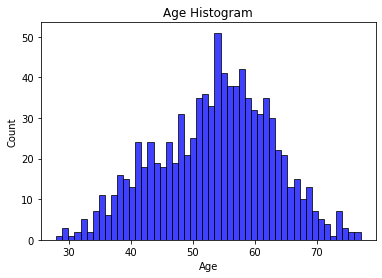

In [4]:
age = df["Age"]
n, bins, patches = plt.hist(age, 50, facecolor = "b", alpha = 0.75, edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Histogram")
plt.show()


2


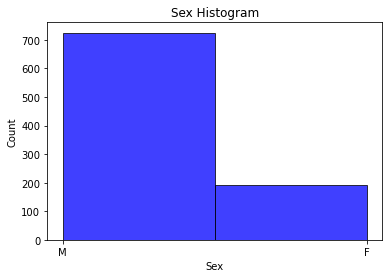

In [5]:
# Sex variable histogram
n = len(pd.unique(df["Sex"]))
print(n)
sex = df["Sex"]
n, bins, patches = plt.hist(sex, 2, facecolor = "b", alpha = 0.75, edgecolor = "black", align = "mid")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Histogram")
plt.show()


4


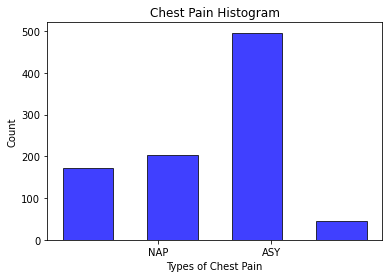

In [6]:
# ChestPainType variable histogram
n = len(pd.unique(df["ChestPainType"]))
print(n)
chestPain = df["ChestPainType"]
n, bins, patches = plt.hist(chestPain, 4, facecolor = "b", alpha = 0.75, edgecolor = "black", rwidth = .6)
plt.xlabel("Types of Chest Pain")
plt.ylabel("Count")
plt.title("Chest Pain Histogram")
plt.show()


67
0
200


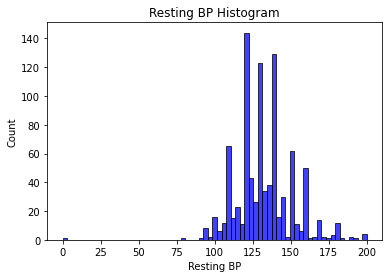

In [7]:
# RestingBP variable histogram
n = len(pd.unique(df["RestingBP"]))
print(n)
print(df["RestingBP"].min())
print(df["RestingBP"].max())

restingBP = df["RestingBP"]
n, bins, patches = plt.hist(restingBP, 67, facecolor = "b", alpha = 0.75, edgecolor = "black")
plt.xlabel("Resting BP")
plt.ylabel("Count")
plt.title("Resting BP Histogram")
plt.show()


222
0
603


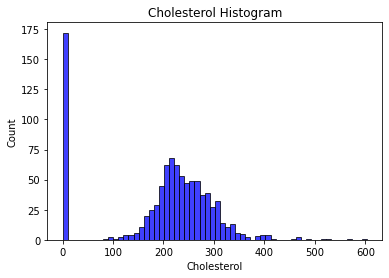

In [8]:
# Choleesterol variable histogram
n = len(pd.unique(df["Cholesterol"]))
print(n)
print(df["Cholesterol"].min())
print(df["Cholesterol"].max())

cholesterol = df["Cholesterol"]
n, bins, patches = plt.hist(cholesterol, 60, facecolor = "b", alpha = 0.75, edgecolor = "black")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.title("Cholesterol Histogram")
plt.show()


In [9]:
# Descriptive Statistics
# Age descriptive
df["Age"].var()
df["Age"].mode()
df["Age"].describe()


count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [10]:
# Sex descriptive
#df["Sex"].var() Doesn't make sense
df["Sex"].mode()
df["Sex"].describe()


count     918
unique      2
top         M
freq      725
Name: Sex, dtype: object

In [11]:
#Chest Pain descriptive
#df["ChestPainType"].var() Doesn't make sense
df["ChestPainType"].mode()
df["ChestPainType"].describe()


count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

In [12]:
#RestingBP descriptive
df["RestingBP"].replace(0, np.NaN, inplace = True)
df["RestingBP"].var()
df["RestingBP"].mode()
df["RestingBP"].describe()


count    917.000000
mean     132.540894
std       17.999749
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [13]:
#Cholesterol descriptive
df["Cholesterol"].replace(0, np.NaN, inplace = True)
df["Cholesterol"].var()
df["Cholesterol"].mode()
df["Cholesterol"].describe()


count    746.000000
mean     244.635389
std       59.153524
min       85.000000
25%      207.250000
50%      237.000000
75%      275.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [14]:
# PMF section
# split data by chest pain type
TA = df[df.ChestPainType == "TA"]
TA_pmf = TA["HeartDisease"].value_counts().sort_index() / len(TA["HeartDisease"])


ATA = df[df.ChestPainType == "ATA"]
ATA_pmf = ATA["HeartDisease"].value_counts().sort_index() / len(ATA["HeartDisease"])


NAP = df[df.ChestPainType == "NAP"]
NAP_pmf = NAP["HeartDisease"].value_counts().sort_index() / len(NAP["HeartDisease"])

ASY = df[df.ChestPainType == "ASY"]
ASY_pmf = ASY["HeartDisease"].value_counts().sort_index() / len(ASY["HeartDisease"])


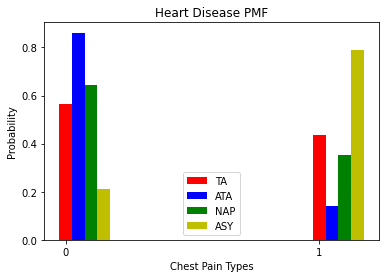

In [15]:
# Plotting PMF 
X = ["No Heart Disease", "Heart Disease"]
X_axis = np.arange(len(X))
width = 0.05
ticks = (0, 1)

bar1 = plt.bar(X_axis, TA_pmf, width, color = "r")
bar2 = plt.bar(X_axis+width, ATA_pmf, width, color = "b")
bar3 = plt.bar(X_axis+width*2, NAP_pmf, width, color = "g")
bar4 = plt.bar(X_axis+width*3, ASY_pmf, width, color = "y")

plt.xticks(ticks)
plt.xlabel("Chest Pain Types")
plt.ylabel("Probability")
plt.title("Heart Disease PMF")
plt.legend((bar1, bar2, bar3, bar4), ("TA", "ATA", "NAP", "ASY"))
plt.show()


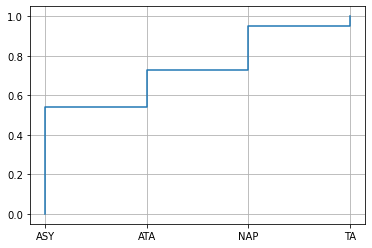

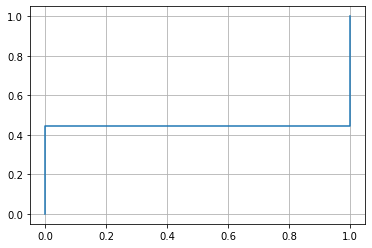

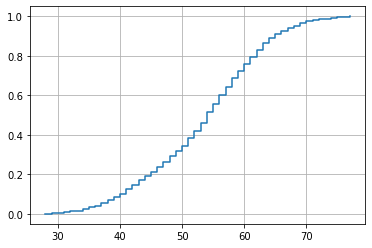

In [16]:
# CDF section
chestPain = df["ChestPainType"]
heartDisease = df["HeartDisease"]
age = df["Age"]
def cdf(chestPainType):
    x, counts = np.unique(chestPainType, return_counts = True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_cdf(chestPainType):
    x, y = cdf(chestPainType)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    plt.plot(x, y, drawstyle = "steps-post")
    plt.grid(True)
    plt.show()
    
plot_cdf(chestPain)
plot_cdf(heartDisease)
plot_cdf(age)


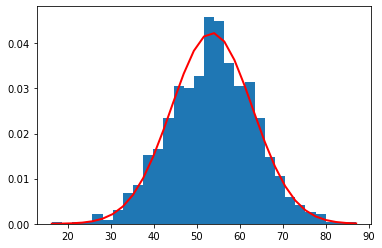

In [17]:
# Analytical Distribution 
mu, sigma = 53.510893, 9.432617
BR_ND = np.random.normal(mu, sigma, 1000)
abs(mu-np.mean(BR_ND))
abs(sigma-np.std(BR_ND, ddof = 1))

count, bins, ignored = plt.hist(BR_ND, 30, density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 *np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()


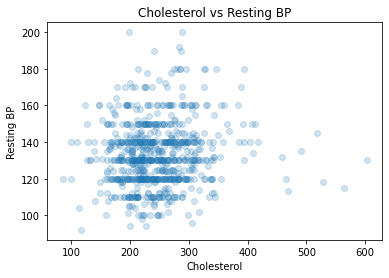

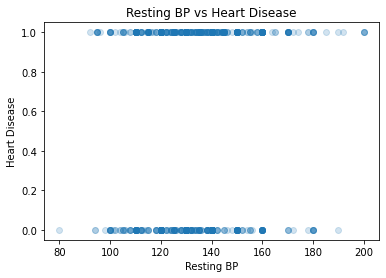

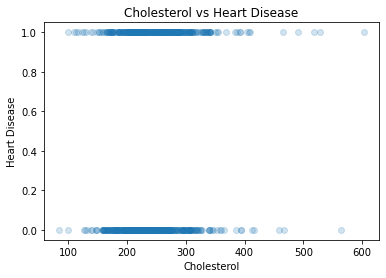

In [18]:
# Scatter Plot Section
plt.scatter(cholesterol, restingBP, alpha = 0.2)
plt.xlabel("Cholesterol")
plt.ylabel("Resting BP")
plt.title("Cholesterol vs Resting BP")
plt.show()

plt.scatter(restingBP, heartDisease, alpha = .2)
plt.xlabel("Resting BP")
plt.ylabel("Heart Disease")
plt.title("Resting BP vs Heart Disease")
plt.show()

plt.scatter(cholesterol, heartDisease, alpha = 0.2)
plt.xlabel("Cholesterol")
plt.ylabel("Heart Disease")
plt.title("Cholesterol vs Heart Disease")
plt.show()


In [22]:
df.cov()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,88.974254,44.691487,33.040153,0.790260,-91.750920,2.601774,1.323300
RestingBP,44.691487,323.990957,98.082145,0.516647,-50.283414,3.346505,1.056514
Cholesterol,33.040153,98.082145,3499.139363,1.194062,-28.804538,3.711862,3.070875
FastingBS,0.790260,0.516647,1.194062,0.178968,-1.415709,0.023778,0.056246
MaxHR,-91.750920,-50.283414,-28.804538,-1.415709,648.228614,-4.363589,-5.071057
Oldpeak,2.601774,3.346505,3.711862,0.023778,-4.363589,1.137572,0.214307
HeartDisease,1.323300,1.056514,3.070875,0.056246,-5.071057,0.214307,0.247420


In [23]:
scipy.stats.spearmanr(df["Cholesterol"], df["RestingBP"], nan_policy = "omit")


SpearmanrResult(correlation=0.09237071747781474, pvalue=0.011599857409592587)

In [24]:
scipy.stats.pearsonr(df["Age"], df["HeartDisease"])


(0.28203850581899736, 3.007953240047123e-18)

In [25]:
scipy.stats.spearmanr(df["Cholesterol"], df["HeartDisease"], nan_policy = "omit")


SpearmanrResult(correlation=0.1148984055175358, pvalue=0.0016701254742558416)

In [26]:
scipy.stats.spearmanr(df["RestingBP"], df["HeartDisease"], nan_policy = "omit")


SpearmanrResult(correlation=0.1158091363660455, pvalue=0.00044144705859855356)

In [28]:
# test of hypothesis
scipy.stats.ttest_ind(restingBP, cholesterol, nan_policy = "omit", equal_var = False)


Ttest_indResult(statistic=-49.91178884147885, pvalue=6.804707233697761e-256)

In [27]:
# test of hypothesis

scipy.stats.ttest_ind(restingBP, heartDisease, nan_policy = "omit", equal_var = False)


Ttest_indResult(statistic=221.9655112935098, pvalue=0.0)

In [21]:
# regression analysis
logit_model = sm.Logit(heartDisease, restingBP, missing = "drop")
result = logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.685856
         Iterations 3
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.002    
Dependent Variable: HeartDisease     AIC:              1259.8599
Date:               2022-02-26 10:58 BIC:              1264.6810
No. Observations:   917              Log-Likelihood:   -628.93  
Df Model:           0                LL-Null:          -630.48  
Df Residuals:       916              LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     3.0000                                      
------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
RestingBP    0.0018     0.0005   3.6424   0.0003   0.0008   0.0028

